In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
### Data Preparation
# Read `crypto_data.csv` into Pandas.
file_path = Path("crypto_data.csv")
crypto_data = pd.read_csv(file_path)
crypto_data

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [3]:
# Discard all cryptocurrencies that are not being traded. In other words, filter for currencies that are 
# currently being traded
crypto_data_drop_IsT = crypto_data[(crypto_data['IsTrading'] == True)]

# Once you have done this, drop the `IsTrading` column from the dataframe.
crypto_data_drop_IsT = crypto_data_drop_IsT.drop('IsTrading', axis=1)

# Remove all rows that have at least one null value.
crypto_data_drop_IsT.dropna(inplace=True)

# # Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero.
crypto_data_drop_IsT = crypto_data_drop_IsT[crypto_data_drop_IsT['TotalCoinsMined'] != 0]
crypto_data_drop_IsT

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [4]:
# Delete the `CoinName` from the original dataframe.
crypto_data_drop_IsT_CoinN = crypto_data_drop_IsT.drop('CoinName', axis=1)

# Convert the remaining features with text values, `Algorithm` and ProofType`, into numerical data by creating
# dummy variables.
crypto_data_drop_IsT_CoinN = pd.get_dummies(crypto_data_drop_IsT_CoinN, columns=['Algorithm', 'ProofType'])

# Drop the label to create the X data
X = crypto_data_drop_IsT_CoinN.drop('Unnamed: 0', axis=1)
y = crypto_data_drop_IsT_CoinN['Unnamed: 0']

y
# # Standardize the dataset so that columns that contain larger values do not unduly influence the outcome.
# scaler = StandardScaler().fit(X)
# X_scaled = scaler.transform(X)
# X_scaled

0         42
2        404
5       1337
7        BTC
8        ETH
        ... 
1238    ZEPH
1242     GAP
1245     BDX
1246     ZEN
1247     XBC
Name: Unnamed: 0, Length: 533, dtype: object

# Examine the number of rows and columns of your dataset now. How did they change?

# Dimensionality Reduction
### Creating dummy variables above dramatically increased the number of features in your dataset. Perform dimensionality reduction with PCA. Rather than specify the number of principal components when you instantiate the PCA model, it is possible to state the desired **explained variance**. For example, say that a dataset has 100 features.  Using `PCA(n_components=0.99)` creates a model that will preserve approximately 99% of the explained variance, whether that means reducing the dataset to 80 principal components or 3. For this project, preserve 90% of the explained variance in dimensionality reduction. How did the number of the features change?

In [5]:
# Using PCA to reduce dimension to three principal components.
pca = PCA(n_components=.9)
principal_components = pca.fit_transform(X)
principal_components

array([[-1.16100750e+10, -5.63847654e+08],
       [-1.06215941e+10, -1.21141575e+09],
       [ 2.75066373e+11,  1.31231231e+11],
       ...,
       [-9.90729802e+09, -7.12205352e+08],
       [-1.15882413e+10, -5.59661129e+08],
       [-1.16091450e+10, -5.63458539e+08]])

In [6]:
# Transform PCA data to a DataFrame
df_crypto_pca = pd.DataFrame(
    data=principal_components, columns=["principal component 1", "principal component 2"]
)
df_crypto_pca

,principal component 1,principal component 2
0,-1.161008e+10,-5.638477e+08
1,-1.062159e+10,-1.211416e+09
2,2.750664e+11,1.312312e+11
3,-1.158292e+10,-5.688662e+08
4,-1.155621e+10,-6.570914e+08
...,...,...
528,-8.877840e+09,-1.295211e+09
529,-1.138613e+10,-4.517219e+08
530,-9.907298e+09,-7.122054e+08
531,-1.158824e+10,-5.596611e+08


In [7]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.8757084, 0.1242916])

# Next, further reduce the dataset dimensions with t-SNE and visually inspect the results. In order to accomplish this task, run t-SNE on the principal components: the output of the PCA transformation.


In [8]:
# The target labels can optionally be used to color the t-SNE plot
labels = y
labels

0         42
2        404
5       1337
7        BTC
8        ETH
        ... 
1238    ZEPH
1242     GAP
1245     BDX
1246     ZEN
1247     XBC
Name: Unnamed: 0, Length: 533, dtype: object

In [9]:
# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_crypto_pca)

In [10]:
# Run t-SNE
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(scaled_features)

C:\Users\jjel0\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [11]:
# Check that dimensions have been reduced to two
tsne_features.shape

(533, 2)

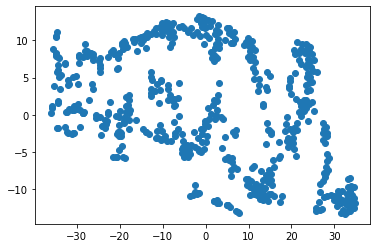

In [12]:
# Then create a scatter plot of the t-SNE output. Observe whether there are distinct clusters or not.
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

### Cluster Analysis with k-Means

C:\Users\jjel0\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1038: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


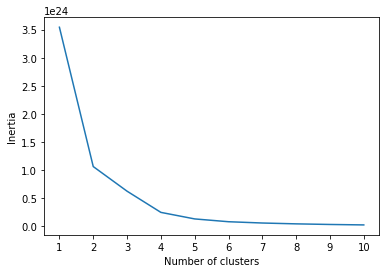

In [15]:
# Create an elbow plot to identify the best number of clusters. Use a for-loop to determine the inertia for each
# `k` between 1 through 10. Determine, if possible, where the elbow of the plot is, and at which value of `k` it
# appears.
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_crypto_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [16]:
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(df_crypto_pca)

# Predict clusters
predictions = model.predict(df_crypto_pca)

# Add the predicted class columns
labels = model.labels_
df_crypto_pca

,principal component 1,principal component 2
0,-1.161008e+10,-5.638477e+08
1,-1.062159e+10,-1.211416e+09
2,2.750664e+11,1.312312e+11
3,-1.158292e+10,-5.688662e+08
4,-1.155621e+10,-6.570914e+08
...,...,...
528,-8.877840e+09,-1.295211e+09
529,-1.138613e+10,-4.517219e+08
530,-9.907298e+09,-7.122054e+08
531,-1.158824e+10,-5.596611e+08


# Recommendation
### Based on your findings, make a brief (1-2 sentences) recommendation to your clients. Can the cryptocurrencies be clustered together? If so, into how many clusters? 
